In [1]:
# Importing libraries
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Reading the CSV
df = pd.read_csv('movies.csv')

In [3]:
# Creating a copy from the original data set to prevent accidental modifications
df_fillNA = df.copy()

In [4]:
# Filling the NA values with zeros 
df_fillNA['gross'].fillna(0, inplace=True)
df_fillNA['budget'].fillna(0, inplace=True)

In [5]:
#Checking for NULLs percentage
for col in df.columns:
    pct_missing = np.mean(df_fillNA[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.0
gross - 0.0
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [6]:
# Changing the type to Int64
df_fillNA.budget = df_fillNA.budget.astype('int64')
df_fillNA.gross = df_fillNA.gross.astype('int64')

In [7]:
# Splitting released column using a delimiter and adding it into another column
df_fillNA[['released','new_date']] = df_fillNA.released.str.split(', ', expand=True)

In [8]:
# Getting the first 4 characters to only get the year
df_fillNA['correctyear'] = df_fillNA.new_date.astype(str).str[:4]

In [9]:
# Visualizing columns
df_fillNA[['name','gross','budget','correctyear']].sort_values(by=['gross'],inplace=False,ascending=False)

,name,gross,budget,correctyear
5445,Avatar,2847246203,237000000,2009
7445,Avengers: Endgame,2797501328,356000000,2019
3045,Titanic,2201647264,200000000,1997
6663,Star Wars: Episode VII - The Force Awakens,2069521700,245000000,2015
7244,Avengers: Infinity War,2048359754,321000000,2018
...,...,...,...,...
1617,Mortal Passions,0,0,1990
1614,Edge of Sanity,0,0,1989
1606,"I, Madman",0,0,1989
1601,My Twentieth Century,0,0,1990


In [10]:
# Checking for duplicates 
df_fillNA.company.drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

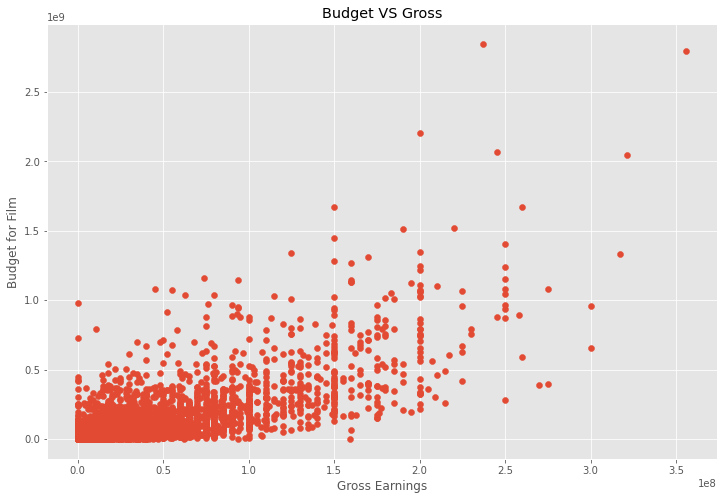

In [11]:
#Checking Correlation betwen gross and budget and company
plt.scatter(x=df_fillNA.budget,y=df_fillNA.gross)
plt.title('Budget VS Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

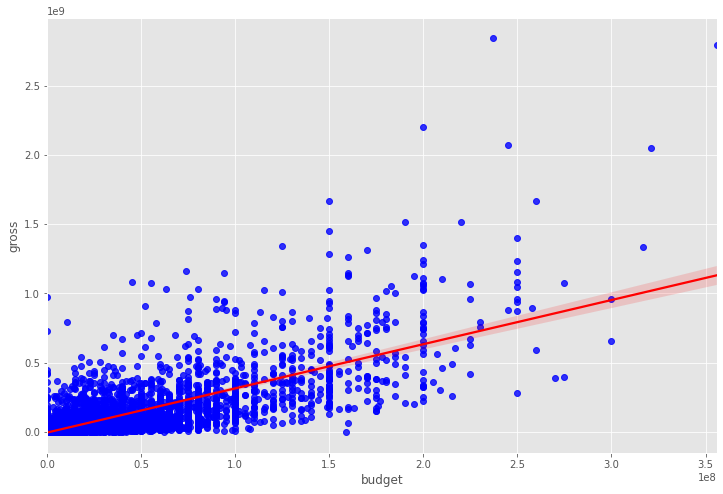

In [12]:
# Plot budget vs gross using seaborn (with a regression line)
sns.regplot(x=df_fillNA.budget,y=df_fillNA.gross,data=df_fillNA,scatter_kws={'color':'blue'}, line_kws={'color':'red'})

In [13]:
# Correlation numbers
df_fillNA.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


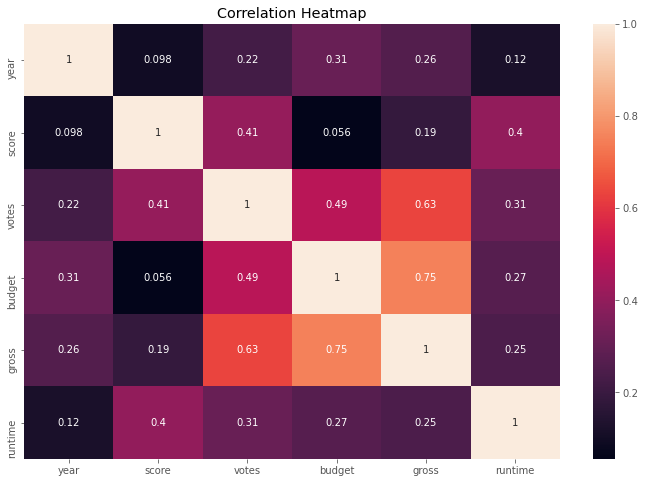

In [14]:
# High correlation betwen budget and gross
corr_matrix = df_fillNA.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Looking at the company (not numeric)
#df_fillNA.head()
df_fillNA[['budget','gross','company']].sort_values(by='budget',ascending=False)

,budget,gross,company
7445,356000000,2797501328,Marvel Studios
7244,321000000,2048359754,Marvel Studios
7075,317000000,1332698830,Walt Disney Pictures
5060,300000000,960996492,Walt Disney Pictures
7066,300000000,657926987,Warner Bros.
...,...,...,...
2139,0,1543112,IRS Media
2136,0,57138719,Largo Entertainment
2130,0,17180393,Gallery Films
5916,0,4778439,Fox Searchlight Pictures


In [17]:
# Changing category features to numerical for regression
df_numerized = df_fillNA.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.sort_values(by= 'gross',ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_date,correctyear
5445,533,5,0,2009,86,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,335,29
7445,535,5,0,2019,31,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,520,39
3045,6896,5,6,1997,87,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,146,17
6663,5144,5,0,2015,86,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,459,35
7244,536,5,0,2018,32,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,504,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,161,4.5,274.0,117,82,2797,55,0,0,1159,92.0,89,10
1614,1745,6,10,1989,15,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,79,9
1606,2691,6,8,1989,40,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,79,9
1601,3836,-1,4,1989,145,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,84,10


In [20]:
df_fillNA.sort_values(by='gross',ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_date,correctyear
5445,Avatar,PG-13,Action,2009,December 18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,April 26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019 (United States),2019
3045,Titanic,PG-13,Drama,1997,December 19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,December 18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,April 27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018 (United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,January 26,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990 (United States),1990
1614,Edge of Sanity,R,Horror,1989,April 14,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989 (United States),1989
1606,"I, Madman",R,Fantasy,1989,April 7,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989 (United States),1989
1601,My Twentieth Century,NaN,Comedy,1989,January 13,7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990 (Japan),1990


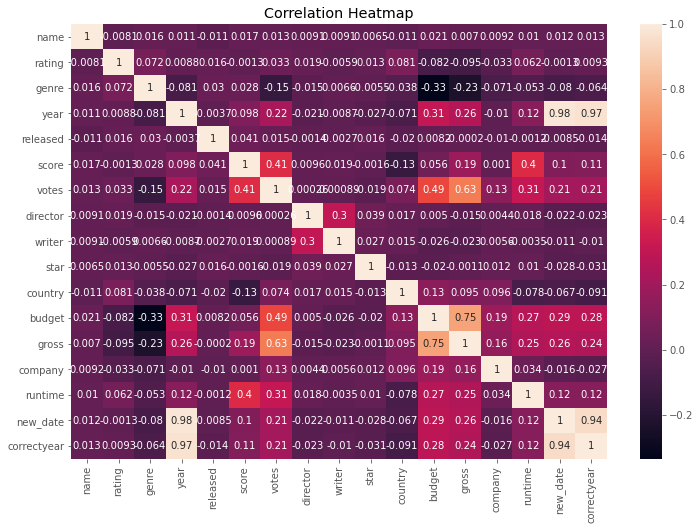

In [21]:
# Heatmap with all features (not that accurate)
corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Unstacking to show highest correlated features
corr_num = df_numerized.corr()
corr_pairs = corr_num.unstack()

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011412
                              ...   
correctyear  gross          0.243457
             company       -0.026538
             runtime        0.115317
             new_date       0.944167
             correctyear    1.000000
Length: 289, dtype: float64

In [23]:
# Sorting features
sort_pairs = corr_pairs.sort_values()
sort_pairs

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145307
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
new_date     new_date       1.000000
correctyear  correctyear    1.000000
Length: 289, dtype: float64

In [29]:
# Most important correlations
high_corr = sort_pairs[(sort_pairs) > 0.5]
high_corr = high_corr[(high_corr) < 1]
high_corr

votes        gross          0.632834
gross        votes          0.632834
             budget         0.750157
budget       gross          0.750157
new_date     correctyear    0.944167
correctyear  new_date       0.944167
year         correctyear    0.967465
correctyear  year           0.967465
new_date     year           0.980716
year         new_date       0.980716
dtype: float64